In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Ignore deprecated warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [45]:
# Read the train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [46]:
# Train dataset
train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [47]:
# Test dataset
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [48]:
print('Train shape',train.shape)
print('Test shape',test.shape)

Train shape (2000, 21)
Test shape (1000, 21)


In [49]:
print('Train data types')
print(train.dtypes)
print('\nTest data types')
print(test.dtypes)

Train data types
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Test data types
id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
ta

In [50]:
comparison_train = pd.DataFrame(columns=["Column", "Train_dType", "Test_dType", 'train_value', 'test_value'])


for column_name, train_data_type in train.dtypes.items():
   
    if column_name in test.columns:
        
        test_data_type = test.dtypes[column_name]
       
        comparison_train = comparison_train.append({
            "Column": column_name,
            "Train_dType": train_data_type,
            "Test_dType": test_data_type,
            "train_value": train[column_name][0],
            "test_value": test[column_name][0]
        }, ignore_index=True)


print(comparison_train)

           Column Train_dType Test_dType train_value test_value
0   battery_power       int64      int64         842       1043
1            blue       int64      int64           0          1
2     clock_speed     float64    float64         2.2        1.8
3        dual_sim       int64      int64           0          1
4              fc     float64      int64         1.0         14
5          four_g     float64      int64         0.0          0
6      int_memory     float64      int64         7.0          5
7           m_dep     float64    float64         0.6        0.1
8       mobile_wt     float64      int64       188.0        193
9         n_cores     float64      int64         2.0          3
10             pc     float64      int64         2.0         16
11      px_height     float64      int64        20.0        226
12       px_width     float64      int64       756.0       1412
13            ram     float64      int64      2549.0       3476
14           sc_h     float64      int64


- The data types between train and test datasets are consistent for most columns.
- However, there are some discrepancies between the data types of certain columns, such as 'fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', and 'ram'.
- These differences could potentially affect model performance and need to be addressed.

Actions:
- Convert the data types of the mentioned columns in the train dataset to match those in the test dataset.


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

- The train dataset has missing values in several columns, whereas the test dataset has no missing values.

 Actions Needed:
- Handle missing values in the train dataset appropriately, such as imputation or deletion, to ensure data integrity.


In [53]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000



- Most of the features have consistent counts, indicating minimal missing values.
- Features like `fc`, `four_g`, `int_memory`, `m_dep`, `mobile_wt`, `n_cores`, `pc`, `px_height`, `px_width`, and `ram` have similar statistics, suggesting a fairly normal distribution.
- Some features like `battery_power`, `clock_speed`, `sc_h`, `sc_w`, and `talk_time` have a wide range of values, with noticeable differences between their means and medians, indicating potential skewness in their distributions.

Actions Needed:
- Check for missing values and outliers in the dataset to ensure data quality.
- Consider visualizing the distributions of numerical features to further analyze their characteristics.
- Explore potential correlations between features to understand their relationships and relevance to the target variable (`price_range`).

In [54]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [55]:
train[train.isnull().any(axis=1)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
217,1336,0,0.9,0,5.0,1.0,17.0,NaN,194.0,5.0,...,55.0,583.0,1869.0,13.0,1.0,16,1,1,1,1
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
292,1995,1,1.9,0,6.0,0.0,9.0,0.8,139.0,6.0,...,NaN,1963.0,1203.0,14.0,12.0,18,1,1,1,2
293,1517,0,0.5,0,6.0,1.0,48.0,0.6,143.0,5.0,...,NaN,1489.0,2822.0,15.0,5.0,11,1,1,1,3
341,811,1,2.4,1,5.0,1.0,2.0,0.3,106.0,6.0,...,NaN,NaN,NaN,NaN,NaN,2,1,0,1,1
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,749.0,2261.0,7.0,6.0,16,1,1,1,1


Since the null values are small portion of the data I will drop these values.

In [56]:
train.dropna(inplace=True)

In [57]:
#Convert the data types of the mentioned columns in the train dataset to match those in the test dataset.
train['fc'] = train['fc'].astype('int64')
train['four_g'] = train['four_g'].astype('int64')
train['int_memory'] = train['int_memory'].astype('int64')
train['mobile_wt'] = train['mobile_wt'].astype('int64')
train['n_cores'] = train['n_cores'].astype('int64')
train['pc'] = train['pc'].astype('int64')
train['px_height'] = train['px_height'].astype('int64')
train['px_width'] = train['px_width'].astype('int64')
train['ram'] = train['ram'].astype('int64')
train['sc_h'] = train['sc_h'].astype('int64')
train['sc_w'] = train['sc_w'].astype('int64')

In [58]:
#check for null values in the dataset again
train[train.isnull().any(axis=1)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [59]:
#check for duplicates in the dataset
train.duplicated().sum()

0

In [60]:
test.duplicated().sum()

0

- There's no duplicates on train and test datasets 

In [61]:
train.corr()['price_range']

battery_power    0.199277
blue             0.021330
clock_speed     -0.006675
dual_sim         0.019108
fc               0.024738
four_g           0.015537
int_memory       0.041812
m_dep           -0.001396
mobile_wt       -0.032168
n_cores          0.004662
pc               0.034716
px_height        0.147956
px_width         0.163319
ram              0.917448
sc_h             0.021643
sc_w             0.038371
talk_time        0.020511
three_g          0.024896
touch_screen    -0.030315
wifi             0.019546
price_range      1.000000
Name: price_range, dtype: float64

- **RAM (ram)** has the highest positive correlation with the price_range target variable (0.917), indicating that devices with higher RAM tend to have higher price ranges.
- **Battery Power (battery_power)** also shows a moderate positive correlation (0.199) with the price_range, suggesting that devices with higher battery power may have higher price ranges.
- Other features such as **px_width**, **px_height**, **int_memory**, and **pc** also show moderate positive correlations with the price_range.

Actions:
- Further investigate the relationship between RAM and price_range to understand its impact on device pricing.
- Visualize the relationships between these features and price_range to gain deeper insights.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


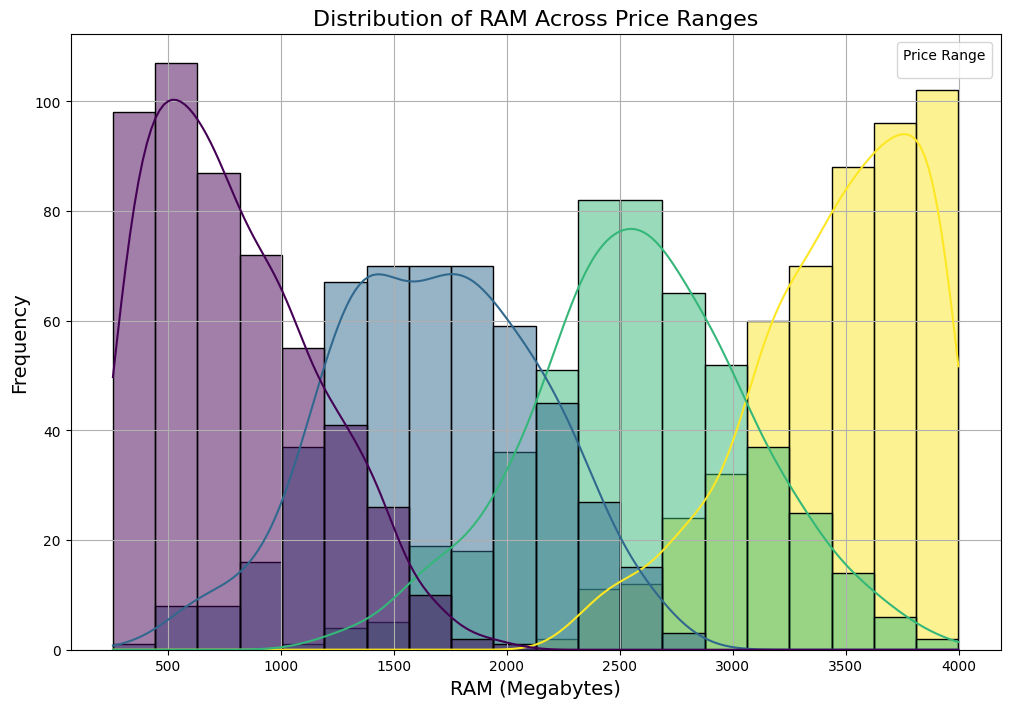

In [26]:
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot histograms for RAM within each price range
sns.histplot(data=train, x='ram', hue='price_range', bins=20, kde=True, palette='viridis')

# Add labels and title
plt.xlabel('RAM (Megabytes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of RAM Across Price Ranges', fontsize=16)
plt.legend(title='Price Range', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


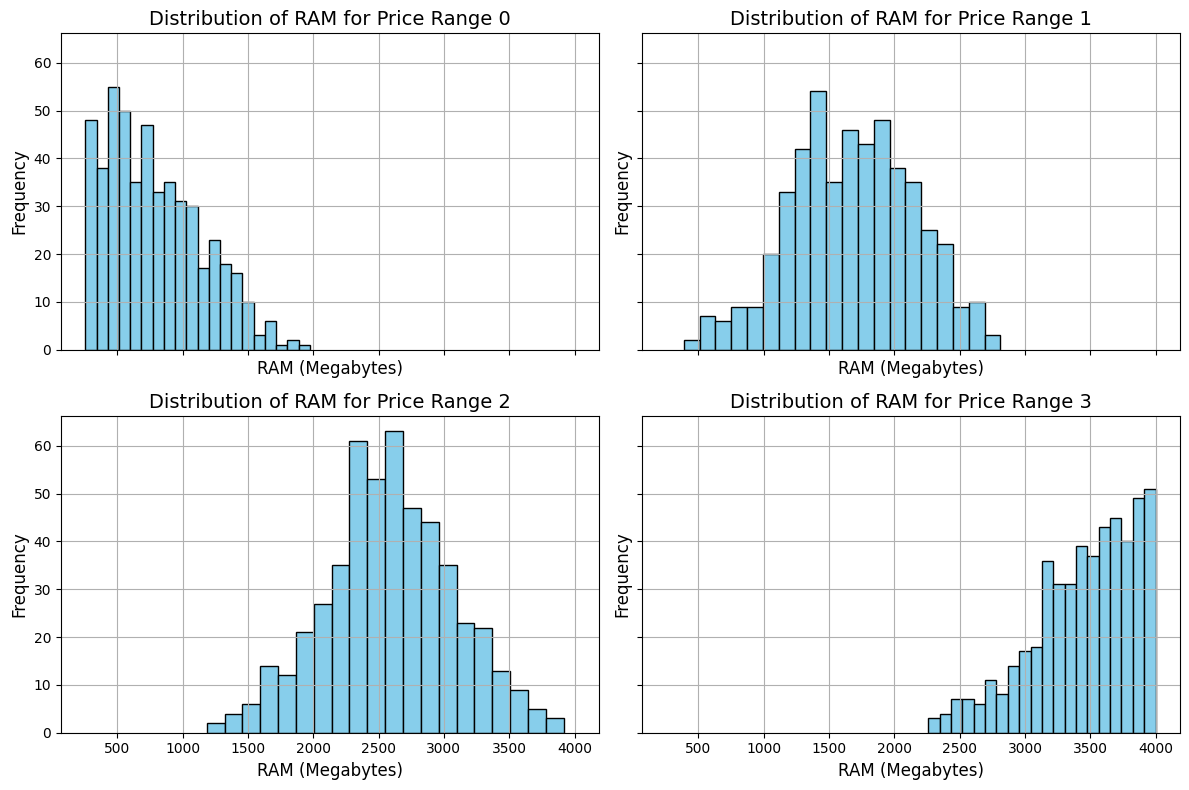

In [32]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# Iterate through each price range
for i, ax in enumerate(axes.flatten()):
    # Filter data for the current price range
    price_range_data = train[train['price_range'] == i]
    
    # Plot the histogram of RAM for the current price range
    ax.hist(price_range_data['ram'], bins=20, color='skyblue', edgecolor='black')
    
    # Add labels and title for each subplot
    ax.set_xlabel('RAM (Megabytes)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'Distribution of RAM for Price Range {i}', fontsize=14)
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [62]:
corr = train.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011104,0.013228,-0.039297,0.033141,0.016017,-0.004863,0.031583,0.000248,-0.029953,...,0.012494,-0.010127,-0.001069,-0.031107,-0.022805,0.050669,0.011558,-0.011828,-0.008665,0.199277
blue,0.011104,1.000000,0.019737,0.032818,0.003429,0.014893,0.042797,0.002838,-0.008034,0.036781,...,-0.008207,-0.042896,0.027858,-0.005054,-0.002811,0.016090,-0.030131,0.012583,-0.020515,0.021330
clock_speed,0.013228,0.019737,1.000000,-0.004107,0.002249,-0.039562,0.008581,-0.013557,0.012485,-0.005830,...,-0.017501,-0.012730,0.002934,-0.030373,-0.007526,-0.011362,-0.044650,0.022759,-0.022777,-0.006675
dual_sim,-0.039297,0.032818,-0.004107,1.000000,-0.028049,0.004630,-0.015270,-0.021391,-0.006974,-0.023292,...,-0.019322,0.014253,0.041885,-0.011956,-0.017679,-0.036327,-0.013804,-0.014645,0.024390,0.019108
fc,0.033141,0.003429,0.002249,-0.028049,1.000000,-0.018603,-0.026542,-0.001497,0.024745,-0.014378,...,-0.010548,-0.002789,0.018691,-0.011399,-0.012111,-0.006016,0.000422,-0.016109,0.018817,0.024738
four_g,0.016017,0.014893,-0.039562,0.004630,-0.018603,1.000000,0.008367,-0.000987,-0.016106,-0.030472,...,-0.015409,0.010604,0.007361,0.027384,0.037817,-0.045557,0.584403,0.015437,-0.020046,0.015537
int_memory,-0.004863,0.042797,0.008581,-0.015270,-0.026542,0.008367,1.000000,0.005232,-0.035050,-0.026921,...,0.012372,-0.008668,0.029840,0.039254,0.011409,-0.003210,-0.008742,-0.027435,0.008377,0.041812
m_dep,0.031583,0.002838,-0.013557,-0.021391,-0.001497,-0.000987,0.005232,1.000000,0.021447,-0.002861,...,0.023440,0.021301,-0.010281,-0.026461,-0.020337,0.016692,-0.011605,-0.002461,-0.027577,-0.001396
mobile_wt,0.000248,-0.008034,0.012485,-0.006974,0.024745,-0.016106,-0.035050,0.021447,1.000000,-0.019204,...,-0.000562,0.000098,-0.004048,-0.036263,-0.020188,0.003889,0.003703,-0.013367,0.001625,-0.032168
n_cores,-0.029953,0.036781,-0.005830,-0.023292,-0.014378,-0.030472,-0.026921,-0.002861,-0.019204,1.000000,...,-0.008214,0.024549,0.005224,-0.000755,0.026164,0.012299,-0.015026,0.023327,-0.011149,0.004662


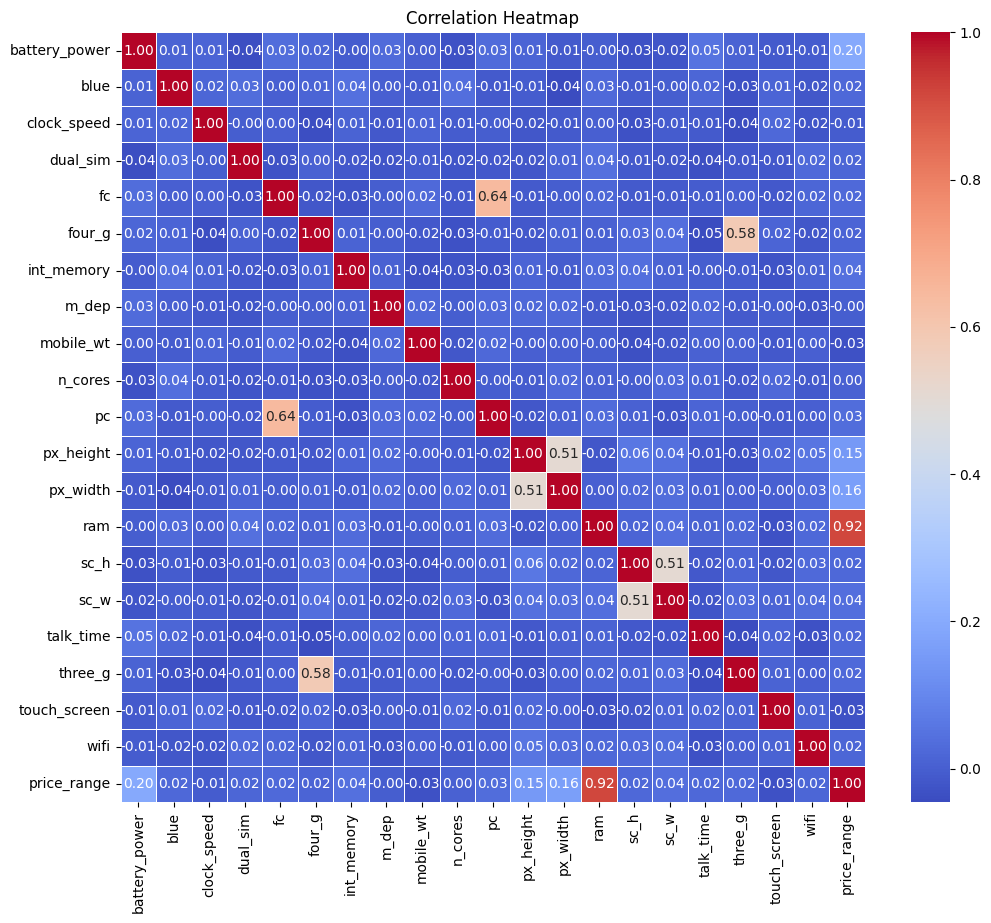

In [63]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [64]:
# Initialize an empty DataFrame to store max correlated features
max_corr_features_train = pd.DataFrame(columns=['Feature', 'Top Correlated Feature 1', 'Correlation 1', 'Top Correlated Feature 2', 'Correlation 2'])

# Iterate over each feature
for feature in corr.columns:
    # Sort the correlations for the current feature by absolute value and exclude the feature itself
    sorted_corr = corr[feature].drop(feature).abs().sort_values(ascending=False)
    
    # Extract the top two correlated features and their correlations
    top_corr_features = sorted_corr.head(2)
    top_corr_features_names = top_corr_features.index.tolist()
    top_corr_values = top_corr_features.values.tolist()
    
    # Store the results in the max_corr_features_train DataFrame
    max_corr_features_train = max_corr_features_train.append({
        'Feature': feature,
        'Top Correlated Feature 1': top_corr_features_names[0],
        'Correlation 1': top_corr_values[0],
        'Top Correlated Feature 2': top_corr_features_names[1],
        'Correlation 2': top_corr_values[1]
    }, ignore_index=True)

# Display the results
max_corr_features_train


,Feature,Top Correlated Feature 1,Correlation 1,Top Correlated Feature 2,Correlation 2
0,battery_power,price_range,0.199277,talk_time,0.050669
1,blue,px_width,0.042896,int_memory,0.042797
2,clock_speed,three_g,0.044650,four_g,0.039562
3,dual_sim,ram,0.041885,battery_power,0.039297
4,fc,pc,0.644641,battery_power,0.033141
5,four_g,three_g,0.584403,talk_time,0.045557
6,int_memory,blue,0.042797,price_range,0.041812
7,m_dep,battery_power,0.031583,wifi,0.027577
8,mobile_wt,sc_h,0.036263,int_memory,0.035050
9,n_cores,blue,0.036781,four_g,0.030472


Battery Power and Price Range:
- There is a moderate positive correlation (0.199277) between battery power and price range.
Action: 
- Since battery power seems to have a moderate impact on price range, it might be beneficial to explore further how different battery power levels correspond to different price ranges. This could involve visualizing the distribution of battery power across different price ranges and identifying any patterns.

RAM and Price Range:
- RAM has a very high positive correlation (0.917448) with price range, indicating that devices with higher RAM tend to have higher prices.
Action: 
- Given the strong correlation, RAM appears to be a crucial feature for predicting the price range. You may consider feature engineering techniques to leverage RAM effectively, such as transforming RAM values to a categorical variable representing different RAM tiers or creating interaction features involving RAM.

Front Camera Megapixels (FC) and Primary Camera Megapixels (PC):
- There is a very high positive correlation (0.644641) between front camera megapixels (FC) and primary camera megapixels (PC).
Action:
- The strong correlation suggests that FC and PC may capture similar information about the device's camera capabilities. combining these features into a single camera-related metric.

Pixel Resolution Height and Pixel Resolution Width:
- Pixel resolution height and width are highly correlated with each other (0.509599 and 0.509599, respectively).
Action:
- Since these features are highly correlated, combining them into a single feature representing total pixel resolution or aspect ratio help reduce the dimensionality of the feature space and capture the overall pixel density of the device's display more effectively.

Screen Height (sc_h) and Screen Width (sc_w):
- Screen height and width are highly correlated with each other (0.507393 and 0.507393, respectively).
Action: 
- Similar to pixel resolution, since these features are highly correlated, combining them into a single feature representing screen size or aspect ratio could simplify the feature space and capture the overall screen dimensions more efficiently.

#### Feature Engineering

Battery Power and Talk Time
- I'll create a new feature called "power_efficiency" by multiplying battery power with talk time.

In [65]:
# Feature Engineering: Battery Power and Talk Time
train['power_efficiency'] = train['battery_power'] * train['talk_time']

Total Camera Quality
- I'll create a new feature called "total_camera_quality" by adding front camera megapixels (FC) with primary camera megapixels (PC).

In [66]:
# Feature Engineering: Total Camera Quality
train['total_camera_quality'] = train['fc'] + train['pc']

Total Pixel Resolution
- I'll create a new feature called "total_pixel_resolution" by multiplying pixel height (px_height) with pixel width (px_width).

In [67]:
# Feature Engineering: Total Pixel Resolution
train['total_pixel_resolution'] = train['px_height'] * train['px_width']

Screen Size
- I'll create a new feature called "screen_size" by multiplying screen height (sc_h) with screen width (sc_w).

In [68]:
# Feature Engineering: Screen Size
train['total_screen_size'] = train['sc_h'] * train['sc_w']

3G and 4G 
- The correlation between three_g and price_range is approximately 0.025, while the correlation between four_g and price_range is approximately 0.016. Although neither correlation is particularly strong, three_g has a slightly higher correlation with price_range.

So, I could decide to keep three_g and drop four_g as it seems to have slightly more relevance to the target variable.

In [69]:
train.drop(['four_g'], axis=1, inplace=True)

Mobile Size Index
- Calculate the product of mobile weight and mobile depth to represent the overall size of the device.

- The Mobile Size Index reflects both the weight and depth of the device, offering a unified metric for assessing its size.
- A higher Mobile Size Index indicates a larger and potentially bulkier device, while a lower index suggests a lighter and more compact device.
This feature can be useful for understanding the physical dimensions of the device and its potential impact on user experience, portability, and handling.

In [70]:
# Feature Engineering: Mobile Size Index
train['mobile_size_index'] = train['mobile_wt'] + train['m_dep']


In [71]:
# Calculate correlation between new features and target variable
new_feature_corr = train[['power_efficiency', 'total_camera_quality', 'total_pixel_resolution', 'total_screen_size','mobile_size_index', 'price_range']].corr()['price_range']

# Print correlation values
print(new_feature_corr)

power_efficiency          0.127664
total_camera_quality      0.033593
total_pixel_resolution    0.174650
total_screen_size         0.041101
mobile_size_index        -0.032172
price_range               1.000000
Name: price_range, dtype: float64


In [72]:
# Calculate correlation between new features and target variable
new_feature_corr = train[['power_efficiency', 'total_camera_quality', 'total_pixel_resolution','total_screen_size','mobile_size_index', 'price_range']].corr()['price_range']

# Compare with previous correlation values
prev_corr = {
    'Feature': ['battery_power', 'talk_time', 'fc', 'pc', 'px_height', 'px_width', 'sc_h', 'sc_w','mobile_wt','m_dep'],
    'Previous Correlation': [0.199277, 0.050669, 0.024738, 0.034716, 0.147956, 0.163319,0.021643,0.038371, -0.001396, -0.032168]
}

prev_corr_train = pd.DataFrame(prev_corr)

# Combine previous and new correlation values
combined_corr = pd.concat([prev_corr_train.set_index('Feature'), new_feature_corr.rename('New Correlation')], axis=1)

print(combined_corr)


                        Previous Correlation  New Correlation
battery_power                       0.199277              NaN
talk_time                           0.050669              NaN
fc                                  0.024738              NaN
pc                                  0.034716              NaN
px_height                           0.147956              NaN
px_width                            0.163319              NaN
sc_h                                0.021643              NaN
sc_w                                0.038371              NaN
mobile_wt                          -0.001396              NaN
m_dep                              -0.032168              NaN
power_efficiency                         NaN         0.127664
total_camera_quality                     NaN         0.033593
total_pixel_resolution                   NaN         0.174650
total_screen_size                        NaN         0.041101
mobile_size_index                        NaN        -0.032172
price_ra

In [73]:
# Remove Old Features
train.drop(['battery_power', 'talk_time', 'fc', 'pc', 'px_height','mobile_wt','m_dep',
            'px_width', 'sc_h', 'sc_w'], axis=1, inplace=True)

In [74]:
# Apply square root transformation
train['power_efficiency'] = np.sqrt(train['power_efficiency'])
train['total_camera_quality'] = np.sqrt(train['total_camera_quality'])
train['total_pixel_resolution'] = np.sqrt(train['total_pixel_resolution'])
train['total_screen_size'] = np.sqrt(train['total_screen_size'])


In [75]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Define the numerical features to scale
numerical_features = ['clock_speed', 'int_memory',  
                       'n_cores',  'power_efficiency', 'total_camera_quality', 
                      'ram', 'total_pixel_resolution', 'total_screen_size', 'mobile_size_index']

# Scale the numerical features
train[numerical_features] = scaler.fit_transform(train[numerical_features])

In [80]:
# Features and target variable
X = train.drop('price_range', axis=1)  # Features excluding the target variable
y = train['price_range']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=train['price_range'])


In [81]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train RandomForestClassifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8421052631578947

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       100
           1       0.80      0.75      0.77        99
           2       0.77      0.79      0.78       100
           3       0.92      0.89      0.90       100

    accuracy                           0.84       399
   macro avg       0.84      0.84      0.84       399
weighted avg       0.84      0.84      0.84       399



In [17]:
import pickle
with open('classifier.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

##### Test the api

In [ ]:
import requests

# Device specifications
data = {
    'battery_power': 3500,
    'blue': 0,
    'clock_speed': 4.0,
    'dual_sim': 1,
    'fc': 5,
    'four_g': 0,
    'int_memory': 16,
    'm_dep': 0.5,
    'mobile_wt': 100,
    'n_cores': 10,
    'pc': 12,
    'px_height': 1920,
    'px_width': 1080,
    'ram': 2048,
    'sc_h': 5,
    'sc_w': 3,
    'talk_time': 10,
    'three_g': 0,
    'touch_screen': 0,
    'wifi': 0
}

# Make HTTP POST request to Flask app
response = requests.post('http://127.0.0.1:5000/predict', json=data)

# Print prediction
print(response.json())